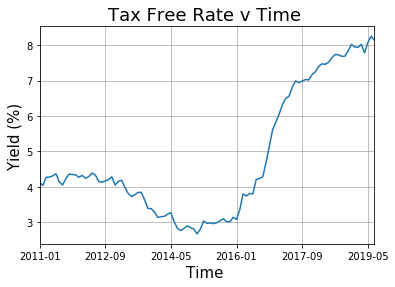

In [4]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
#Get Tables
PreDataA=pd.read_csv("CETES.csv",skiprows=17)
PreDataB=pd.read_csv("Crimes2011-2019.csv")
#Creates DataFrames
FramePreDataA= pd.DataFrame(PreDataA)
FramePreDataA= FramePreDataA.groupby('Fecha').mean()
FramePreDataB= pd.DataFrame(PreDataB)
FramePreDataA["SF43936"].plot()
plt.title('Risk Free Rate v Time ',fontsize=(18));
plt.ylabel('Yield (%)',fontsize=(15));
plt.xlabel('Time ',fontsize=(15));
plt.grid(zorder=0,color='grey', linestyle='-', linewidth=1, alpha=0.5)
plt.savefig("SerieTiempoCETES.png")

In [5]:
Data = pd.merge(FramePreDataB,FramePreDataA , on="Fecha", how="left").dropna(how='any')

df_states =pd.unique(Data['Municipio'])  

csv_header = list(Data.columns.values)

for x in range(len(df_states)):
    for y in range(10,19):
        #Normality Test per Municipality
        stat, p = shapiro(Data[(Data['Municipio']).dropna(axis = 0, how ='any')==df_states[x]][csv_header[y]]) 
        #Limits the research to the already succesfull R squared and variance analysis
        if (str(df_states[x])== "Cuernavaca" and str(csv_header[y])=="RoboViol") or (str(df_states[x])== "Huimanguillo" and str(csv_header[y])=="RoboViol") or (str(df_states[x])== "Acapulco de Juárez" and str(csv_header[y])=="RoboCasa") or (str(df_states[x])== "Playas de Rosarito" and str(csv_header[y])=="RoboCasa"):
            # only Normal Values are considered (Null hypotesis = normal distribution)
            if p>.05 and p<1:
                #shows parameters of succesfull Normality Tests
                print('Normality Test Per Municipality Statistics=%.3f, p=%.3f' % (stat, p), df_states[x], csv_header[y] )
                #Generates Regression Analysis
                X = Data[(Data['Municipio']) == df_states[x]][csv_header[y]].dropna(axis = 0, how ='any').values.reshape(-1,1)
                Y = Data[(Data['Municipio']) == df_states[x]]["SF43936"].dropna(axis = 0, how ='any').values.reshape(-1,1)
                reg = LinearRegression()
                reg.fit(X, Y)
                pred = reg.predict(X)
                X2 = sm.add_constant(X)
                est = sm.OLS(Y, X2)
                est2 = est.fit()
                #Plot residuals following a Normal Distribution
                sm.qqplot(est2.resid).savefig("Error"+str(df_states[x])+str(csv_header[y])+".png")
                plt.clf()
                #Save and Print residuals in a variable
                residuals = est2.fittedvalues
                Error_Frame= pd.DataFrame(residuals)
                #print(residuals)
                # Test Normality of residuals
                statE, pE = shapiro(residuals) 
                print('Normality Test of Error Statistics=%.3f, p=%.3f' % (statE, pE) )
                # prints regression
                plt.scatter(X, Y, color="gray", s=20, alpha=.7, cmap='viridis',marker='o')
                plt.plot(X, pred, color='blue', linewidth=3)
                plt.title('Risk Free Rate v Number of Crimes',fontsize=(18));
                plt.ylabel('Yield (%)',fontsize=(15));
                plt.xlabel('Number of Crimes',fontsize=(15));
                plt.grid(zorder=0,color='grey', linestyle='-', linewidth=1, alpha=0.5)
                plt.savefig("Plot"+str(df_states[x])+str(csv_header[y])+".png")
                plt.clf()
                #Prints Analysis of Variance summary (ANOVA)
                print(est2.summary())
                print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))


Normality Test Per Municipality Statistics=0.988, p=0.380 Playas de Rosarito RoboCasa
Normality Test of Error Statistics=0.988, p=0.380
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     142.0
Date:                Fri, 19 Jul 2019   Prob (F-statistic):           1.06e-21
Time:                        21:14:22   Log-Likelihood:                -182.23
No. Observations:                 115   AIC:                             368.5
Df Residuals:                     113   BIC:                             374.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>